**Reference**: <https://daviddalpiaz.github.io/appliedstats/collinearity.html>

In [4]:
library(tidyverse)

# Why

- Multicolinearity does not affect prediction
- But it hurts when it comes to interpretation (when multicollineary presents, interpretation about the effects of predictors can be misleading)
- If you build a model and you only want to predict, then multicolinearity does not matter. But for explanation, why the model behave the way it fits, multicollinearity will hurts, so make sure to remove colinearity before you explain a model
- if we are interested in explaining the relationship between the predictors and the response, we often want a model that fits well, but with a small number of predictors with little correlation. This trade off is mostly true in general. As a model gets more predictors, errors will get smaller and its prediction will be better, but it will be harder to interpret

<b style="color:red">The below section will explain why multicollinearity hurts explanation. Read the book for concrete example that demonstrate the situation in which multicollinearity occurs and why the interpretation in that case might be inaccurate.</b>

# Exact Colinearity and Multicolinearity

Read the book

**Exact collinearity**: When one predictor is a linear combination of other predictor(s), then $X^TX$ is not invertiable

**Multicolinearity**: Exact collinearity is an extreme example of collinearity, which occurs in multiple regression when predictor variables are highly correlated. Collinearity is often called multicollinearity, since it is a phenomenon that really only occurs during multiple regression.

In [7]:
library(faraway)

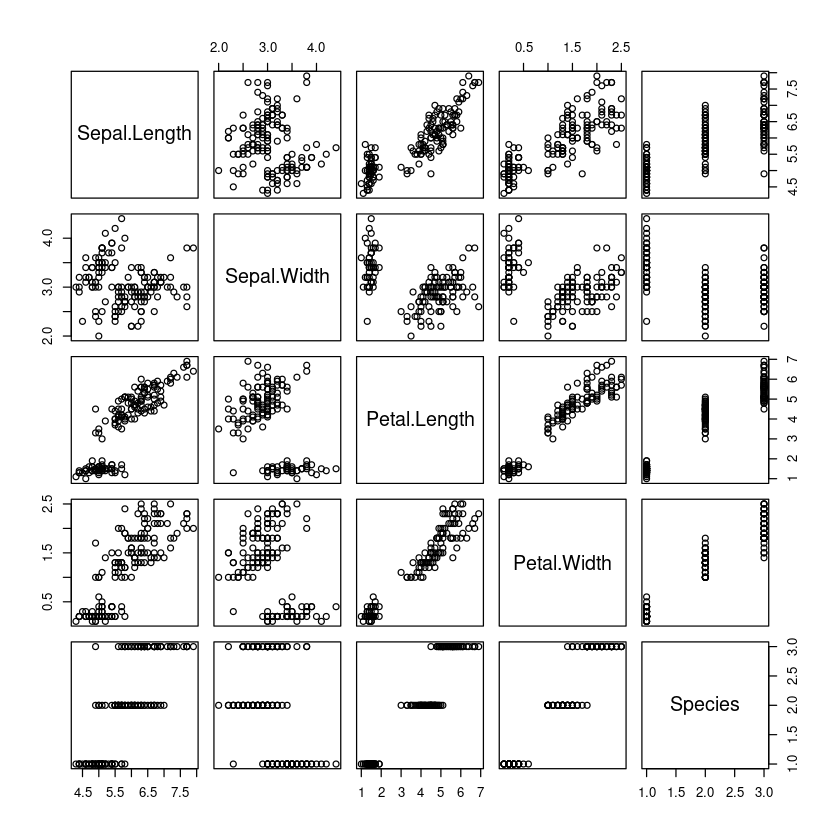

In [6]:
# how to make pairplot
pairs(iris)

---

In [8]:
head(seatpos)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
2,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
3,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
4,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
5,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230
6,47,170,178.7,177.0,92.4,36.0,43.2,37.4,-185.150


> use **`pairs`** to make pair plot

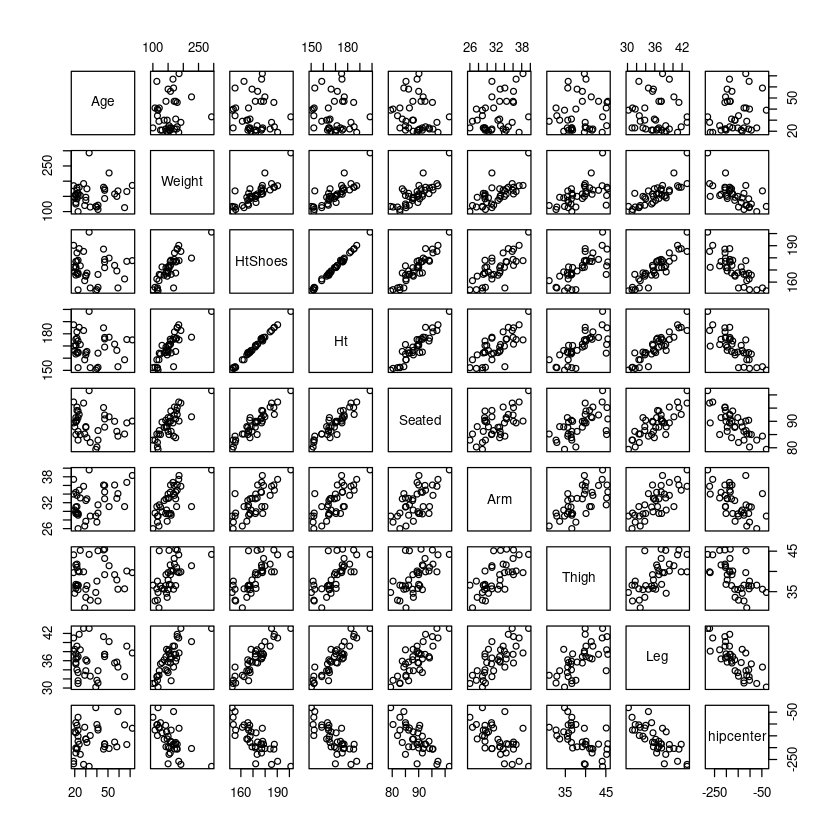

In [10]:
pairs(seatpos)

In [11]:
cor(seatpos)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
Age,1.00000000,0.08068523,-0.07929694,-0.09012812,-0.1702040,0.3595111,0.09128584,-0.04233121,0.2051722
Weight,0.08068523,1.00000000,0.82817733,0.82852568,0.7756271,0.6975524,0.57261442,0.78425706,-0.6403330
HtShoes,-0.07929694,0.82817733,1.00000000,0.99814750,0.9296751,0.7519530,0.72486225,0.90843341,-0.7965964
Ht,-0.09012812,0.82852568,0.99814750,1.00000000,0.9282281,0.7521416,0.73496041,0.90975238,-0.7989274
Seated,-0.17020403,0.77562705,0.92967507,0.92822805,1.0000000,0.6251964,0.60709067,0.81191429,-0.7312537
Arm,0.35951115,0.69755240,0.75195305,0.75214156,0.6251964,1.0000000,0.67109849,0.75381405,-0.5850950
Thigh,0.09128584,0.57261442,0.72486225,0.73496041,0.6070907,0.6710985,1.00000000,0.64954120,-0.5912015
Leg,-0.04233121,0.78425706,0.90843341,0.90975238,0.8119143,0.7538140,0.64954120,1.00000000,-0.7871685
hipcenter,0.20517217,-0.64033298,-0.79659640,-0.79892742,-0.7312537,-0.5850950,-0.59120155,-0.78716850,1.0000000


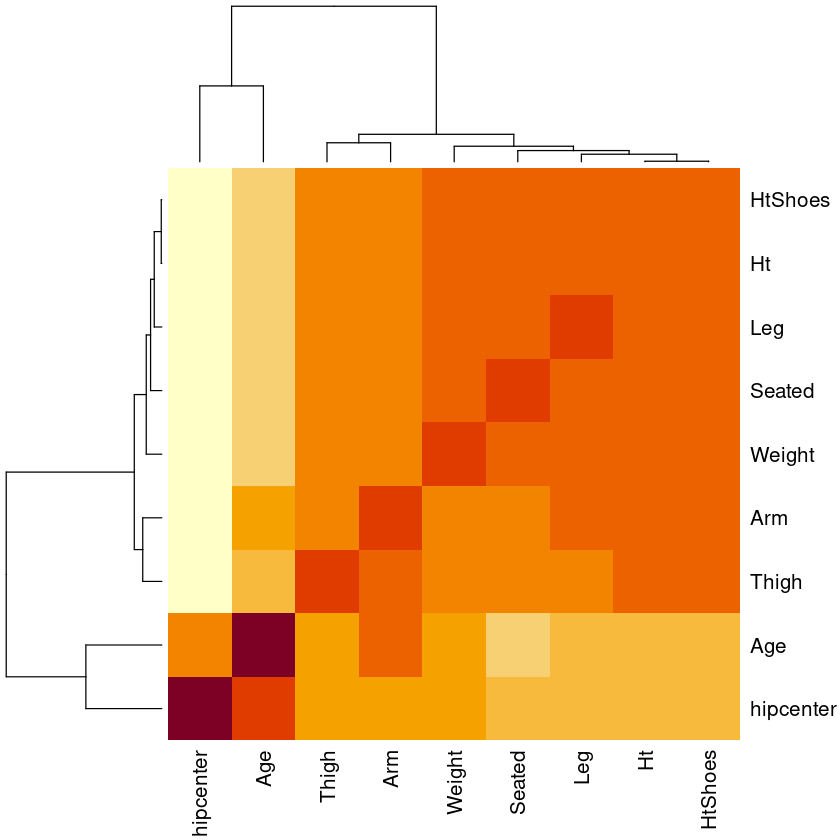

In [12]:
heatmap(cor(seatpos))

The correlation between `Ht` and `HtShoes` are extremely high (nearly 1)

# Variance Inflation Factor

Read the book for the definition.

The variance Inflation Factor (VIF) of the $i^{th}$ variable: $$VIF_i = \frac{1}{1 - R^2_i}$$
where $R_i$ is the percentage variance of the $i^{th}$ predictor that can be explained by other predictors (basically, fit a regression model with the $i^{th}$ predictors as response and use all other predictors to predict)

**Interpretation**: if $R^2_i$ is large, then there is collinearity, so $VIF_i$ will be very large (the $i^{th}$ predictor can be well explained by other predictors, it is highly correlated with other predictors). Otherwise, $R_i^2$ will be close to 0, $VIF_i$ will be close to 1, good

In [15]:
hip_model <- lm(hipcenter ~ ., data = seatpos)

summary(hip_model)


Call:
lm(formula = hipcenter ~ ., data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.827 -22.833  -3.678  25.017  62.337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 436.43213  166.57162   2.620   0.0138 *
Age           0.77572    0.57033   1.360   0.1843  
Weight        0.02631    0.33097   0.080   0.9372  
HtShoes      -2.69241    9.75304  -0.276   0.7845  
Ht            0.60134   10.12987   0.059   0.9531  
Seated        0.53375    3.76189   0.142   0.8882  
Arm          -1.32807    3.90020  -0.341   0.7359  
Thigh        -1.14312    2.66002  -0.430   0.6706  
Leg          -6.43905    4.71386  -1.366   0.1824  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.72 on 29 degrees of freedom
Multiple R-squared:  0.6866,	Adjusted R-squared:  0.6001 
F-statistic:  7.94 on 8 and 29 DF,  p-value: 1.306e-05


In [18]:
faraway::vif(hip_model) %>% print()

       Age     Weight    HtShoes         Ht     Seated        Arm      Thigh 
  1.997931   3.647030 307.429378 333.137832   8.951054   4.496368   2.762886 
       Leg 
  6.694291 


We can manually calculate VIF of `Ht`

In [20]:
# remember to excude the response variable 
hip_ht <- lm(Ht ~ . - hipcenter, data = seatpos)

vif_ht <- 1 / (1 - summary(hip_ht)$r.squared)
vif_ht

[1] 333.1378

**Heuristic**: VIF > 5 then a predictor should be concerned

# Partial Correlation Coefficients

Read the book. Basically, It measures how the response will change if we change the value of a predictor, while we have removed the effect of all other predictors. 

In [2]:
longley

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019


In [4]:
# model Employed using an additive model
mod_add <- lm(Employed ~ ., data = longley)

faraway::vif(mod_add)


GNP.deflator          GNP   Unemployed Armed.Forces   Population         Year 
   135.53244   1788.51348     33.61889      3.58893    399.15102    758.98060

partial correlation coefficients of `Employed` and `Population`

In [1]:
mod_emp <- lm(Employed ~ . - Population, data = longley)

mod_pop <- lm(Population ~ . - Employed, data = longley)
# resid(mod_pop) is the error that can not be explained by all predictors(exclude `Employed`)
# resid(mod_emp) is the error that can not be explained by all predictors (exclude `Population`) 
cor(resid(mod_pop), resid(mod_emp))

[1] -0.07513738

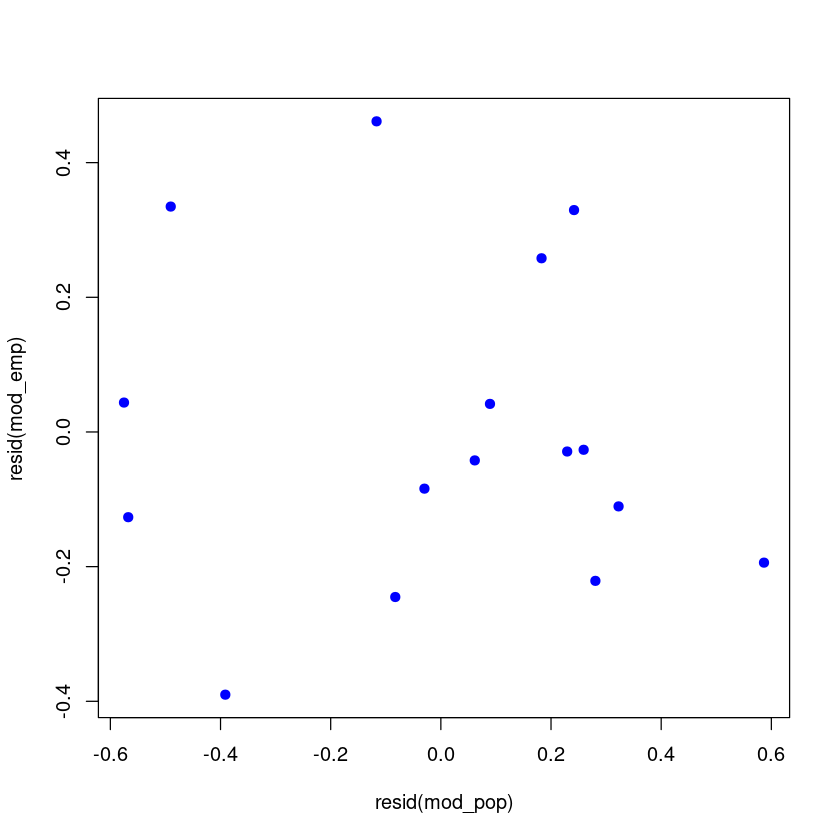

In [3]:
plot(resid(mod_pop), resid(mod_emp), pch = 20, cex = 1.5, col = "blue")

# Simulation

Read the book for simulation set up

In [21]:
set.seed(42)
# parameters of true model: Y = beta0 + beta1 * x1 + beta2 * x2 + epsilon
beta0 <- 7
beta1 <- 3
beta2 <- 4
sigma <- 5

sample_size <- 10
nsims <- 2500

sim <- function(x1, x2) {
  eps <- rnorm(sample_size, mean = 0, sd = sigma)
  y <- beta0 + beta1 * x1 + beta2 * x2 + eps
  sample_data <- tibble(x1, x2, y)
  mod <- lm(y ~ x1 + x2, data = sample_data)
  MSE <- mean(resid(mod)^2)
  c(coef(mod)[-1], MSE) %>% set_names(c("beta_hat_1", "beta_hat_2", "MSE"))
}

In [22]:
x1 = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
x2 = c(1, 2, 3, 4, 5, 7, 6, 10, 9, 8)

# x1 and x2 have high correlation
cor(x1, x2)

[1] 0.9393939

In [26]:
with_collinearity <- map_dfr(1:nsims, ~ sim(x1, x2))
with_collinearity %>% head()

beta_hat_1,beta_hat_2,MSE
<dbl>,<dbl>,<dbl>
1.4521328,5.619492,15.422441
0.5394624,6.911050,15.712669
4.1961381,3.006631,11.486468
0.6334163,5.921269,12.857482
2.8662022,4.268092,17.816106
2.3695777,4.194289,8.189944


In [24]:
z1 = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
z2 = c(9, 2, 7, 4, 5, 6, 3, 8, 1, 10)

# z1 and z1 have low correlation
cor(z1, z2)

[1] 0.03030303

In [25]:
without_collinearity <- map_dfr(1:nsims, ~ sim(z1, z2))
without_collinearity %>% head()

beta_hat_1,beta_hat_2,MSE
<dbl>,<dbl>,<dbl>
3.911210,3.545454,15.55046
2.973565,4.311130,11.83758
3.527747,3.971175,19.65294
3.530263,3.049416,24.40017
3.926775,3.906341,12.35723
3.046379,3.818369,19.42759


In [32]:
with_collinearity %>% map_dbl(mean) %>% print()
without_collinearity %>% map_dbl(mean) %>% print()

beta_hat_1 beta_hat_2        MSE 
  3.005518   3.986331  17.420686 
beta_hat_1 beta_hat_2        MSE 
  3.013414   4.004913  17.705132 


The mean of each coefficient and MSE looks about the same, but notice without collinearity, the estimation of coefficients are closer to the true value, in compare to the case with collinearity. On average, the estimation is correct

In [36]:
c(beta_true_1 = beta1, beta_true_2 = beta2) %>% print()

beta_true_1 beta_true_2 
          3           4 


In [37]:
with_collinearity %>% map_dbl(sd) %>% print()
without_collinearity %>% map_dbl(sd) %>% print()

beta_hat_1 beta_hat_2        MSE 
  1.602454   1.591584   9.198002 
beta_hat_1 beta_hat_2        MSE 
 0.5484684  0.5470381  9.2461677 


We can notice that the variance of $\hat{\beta}$ when there is multicollinearity is much marge then when there is not multicollinearity. That is why the estimate of true $\beta$ is much more less accurate when there is multicollinearity, makes it hard to interpret the coefficients (it might be misleading)


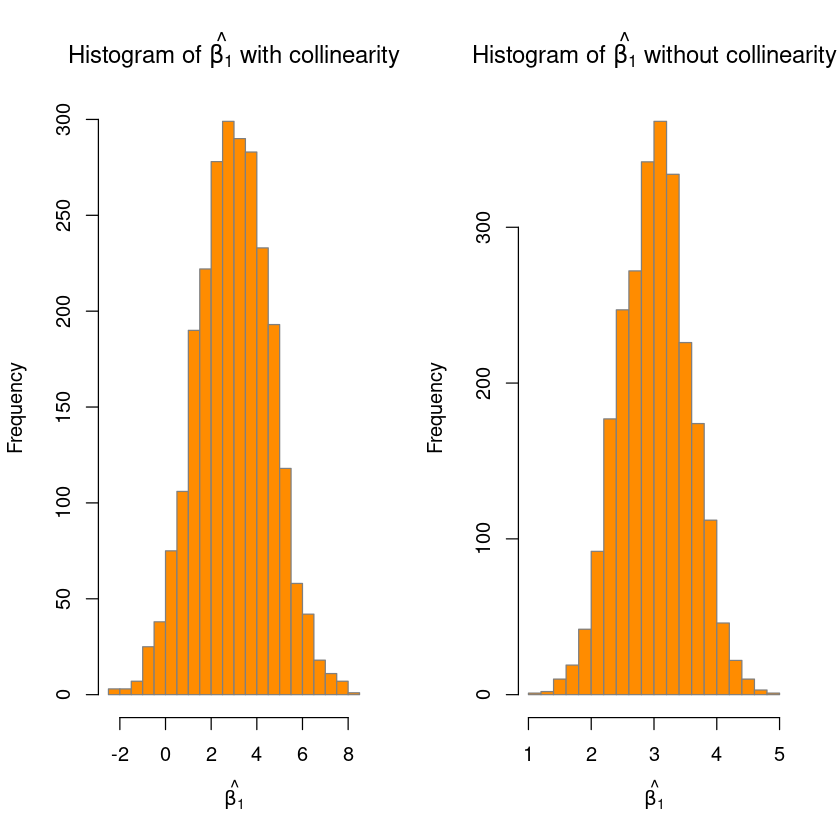

In [29]:
par(mfrow = c(1, 2))
hist(with_collinearity$beta_hat_1,
  breaks = 20, border = "grey50", col = "darkorange",
  xlab = expression(hat(beta[1])),
  main = expression("Histogram of " * hat(beta[1]) * " with collinearity")
)
hist(without_collinearity$beta_hat_1,
  breaks = 20, border = "grey50", col = "darkorange",
  xlab = expression(hat(beta[1])),
  main = expression("Histogram of " * hat(beta[1]) * " without collinearity")
)

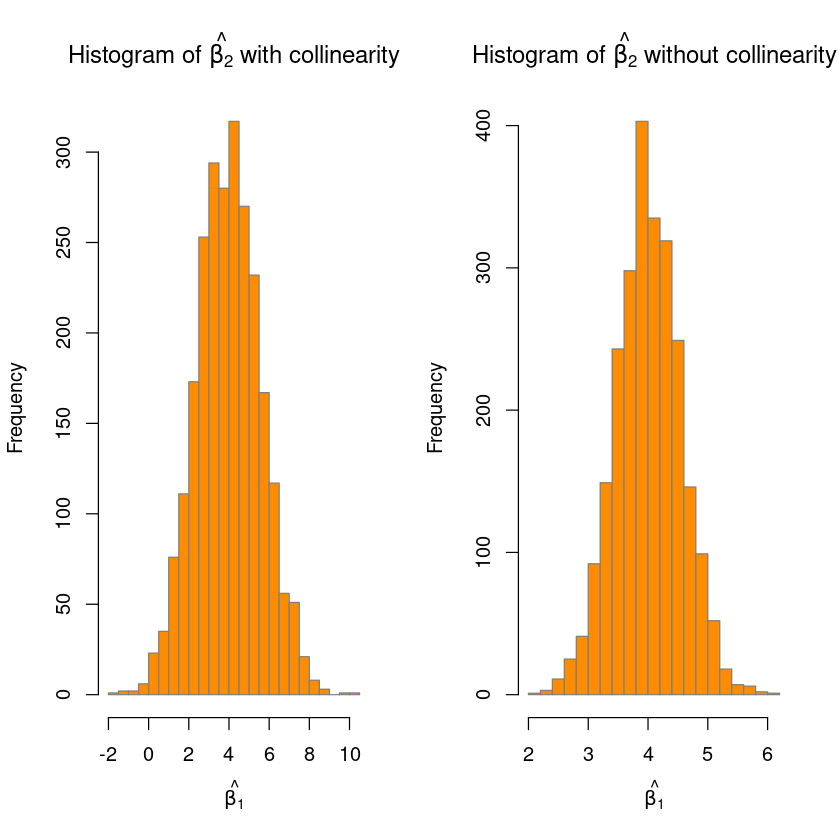

In [30]:
par(mfrow = c(1, 2))
hist(with_collinearity$beta_hat_2,
  breaks = 20, border = "grey50", col = "darkorange",
  xlab = expression(hat(beta[1])),
  main = expression("Histogram of " * hat(beta[2]) * " with collinearity")
)
hist(without_collinearity$beta_hat_2,
  breaks = 20, border = "grey50", col = "darkorange",
  xlab = expression(hat(beta[1])),
  main = expression("Histogram of " * hat(beta[2]) * " without collinearity")
)

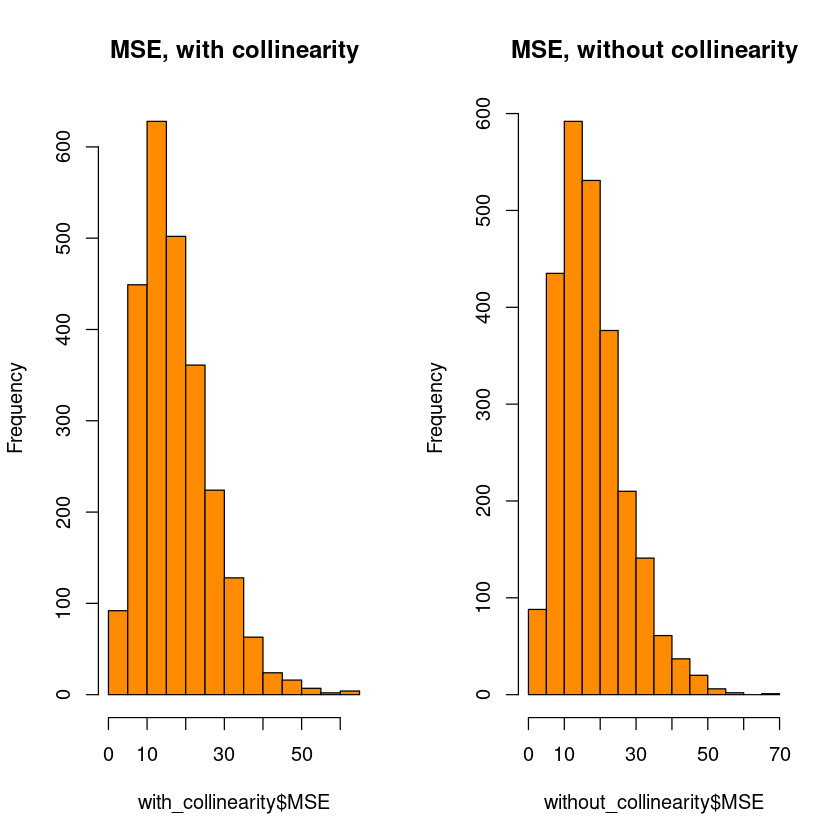

In [31]:
par(mfrow = c(1, 2))
hist(with_collinearity$MSE, main = "MSE, with collinearity", col = "darkorange")
hist(without_collinearity$MSE, main = "MSE, without collinearity", col = "darkorange")

The MSE in both case are the same, because **Multicollinearity** only affects **explanation**, not **prediction**